# Download the CSV file containing the evaluation results

In [ ]:
!wget https://photosylistbucket.s3.us-east-2.amazonaws.com/Batch_4164306_batch_results.csv

# View the statistics of the CSV file.

In [ ]:
import pandas as pd

csvfile = '/content/Batch_4164306_batch_results.csv'

data = pd.read_csv(csvfile)

data.describe()

# Generate Mean Text Faithfulness score plot.

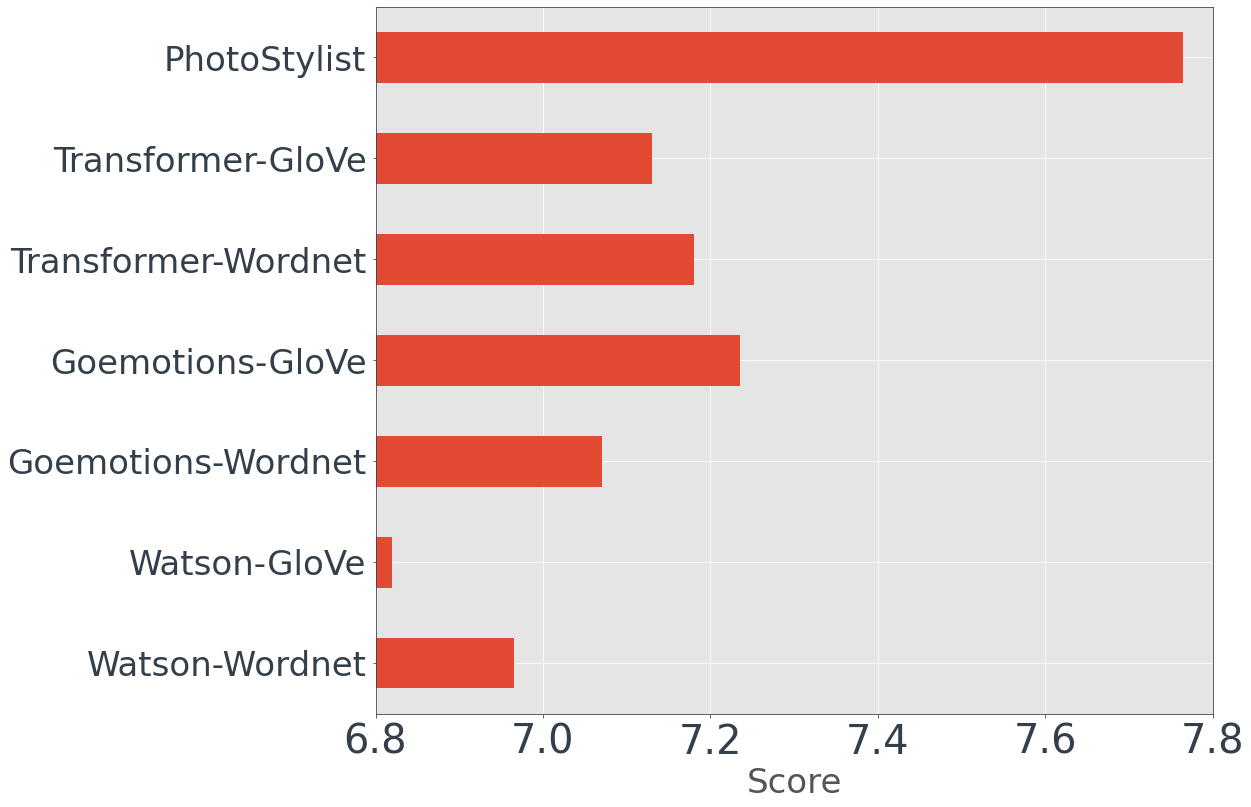

In [15]:
newdatatextfaith = data[['textfaithpst', 'textfaithnvidiaglove', 'textfaithnvidiawordnet', 'textfaithgoemotionsglove', 'textfaithgoemotionswordnet', 'textfaithwatsonglove', 'textfaithwatsonwordnet']]
textfaithstats = newdatatextfaith.describe()
textfaithstats = textfaithstats.transpose()
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=34)
textfaithmeanplot = textfaithstats['mean']
textfaithmeanplot = textfaithmeanplot.rename(index = {'textfaithpst':'PhotoStylist', 'textfaithnvidiaglove':'Transformer-GloVe', 'textfaithnvidiawordnet':'Transformer-Wordnet', 'textfaithwatsonglove':'Watson-GloVe', 'textfaithwatsonwordnet':'Watson-Wordnet', 'textfaithgoemotionsglove':'Goemotions-GloVe', 'textfaithgoemotionswordnet':'Goemotions-Wordnet'})
p = textfaithmeanplot.plot(figsize=(15,13),legend=False,kind="barh");
p.set_xlabel("Score", fontsize=34);
p.invert_yaxis();
p.set_xlim(6.8, 7.8);

# Generate Mean Photorealism score plot.

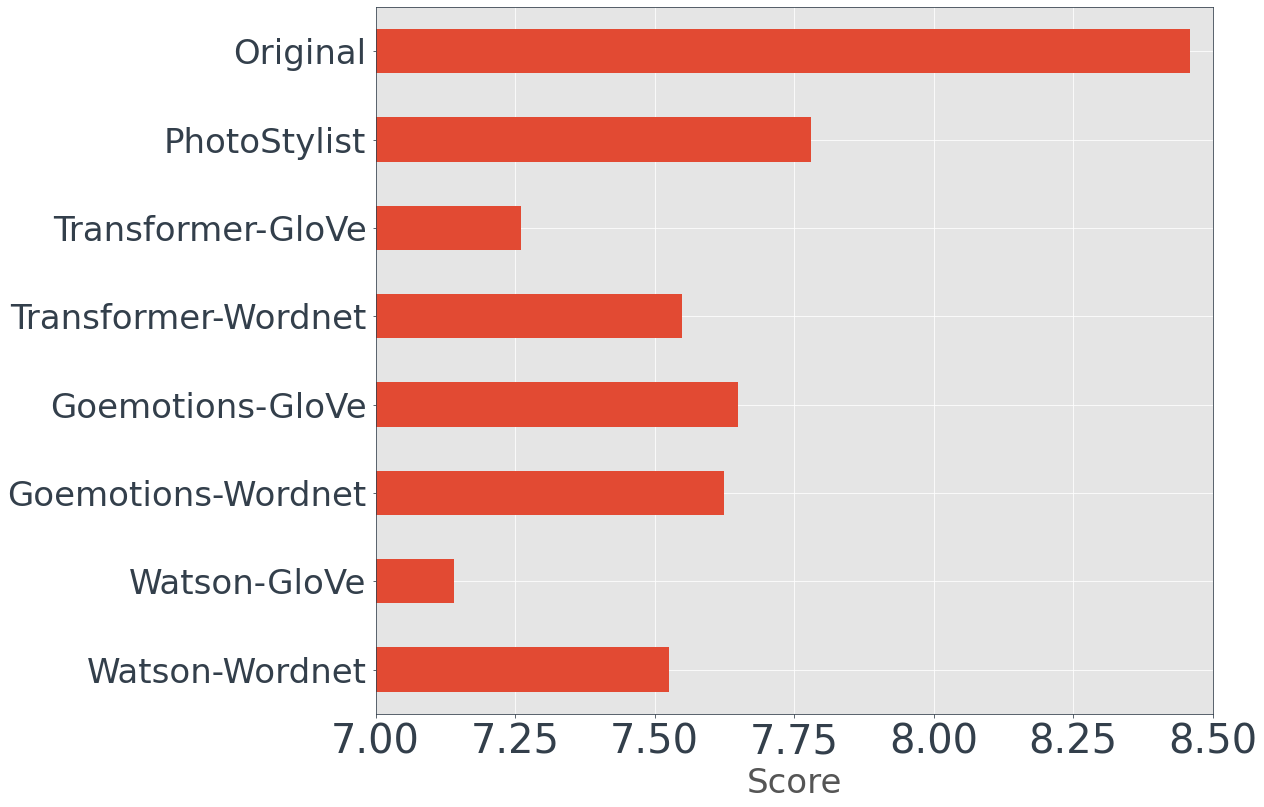

In [16]:
newdataphotoreal = data[['photorealismorig', 'photorealismpst', 'photorealismnvidiaglove', 'photorealismnvidiawordnet', 'photorealismgoemotionsglove', 'photorealismgoemotionswordnet', 'photorealismwatsonglove', 'photorealismwatsonwordnet']]
photorealismstats = newdataphotoreal.describe()
photorealismstats = photorealismstats.transpose()
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
photorealismmeanplot = photorealismstats['mean']
photorealismmeanplot = photorealismmeanplot.rename(index = {'photorealismorig':'Original', 'photorealismpst':'PhotoStylist', 'photorealismnvidiaglove':'Transformer-GloVe', 'photorealismnvidiawordnet':'Transformer-Wordnet', 'photorealismwatsonglove':'Watson-GloVe', 'photorealismwatsonwordnet':'Watson-Wordnet', 'photorealismgoemotionsglove':'Goemotions-GloVe', 'photorealismgoemotionswordnet':'Goemotions-Wordnet'})
plt.style.use('seaborn-paper')
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.tick_params(axis='x', labelsize=40)
plt.tick_params(axis='y', labelsize=34)
p = photorealismmeanplot.plot(figsize=(15,13),legend=False,kind="barh");
p.set_xlabel("Score", fontsize=34);
p.set_xlim(7,8.5);
p.invert_yaxis();

***Curtailed from paper***
# Generate number of times each method receives best score.

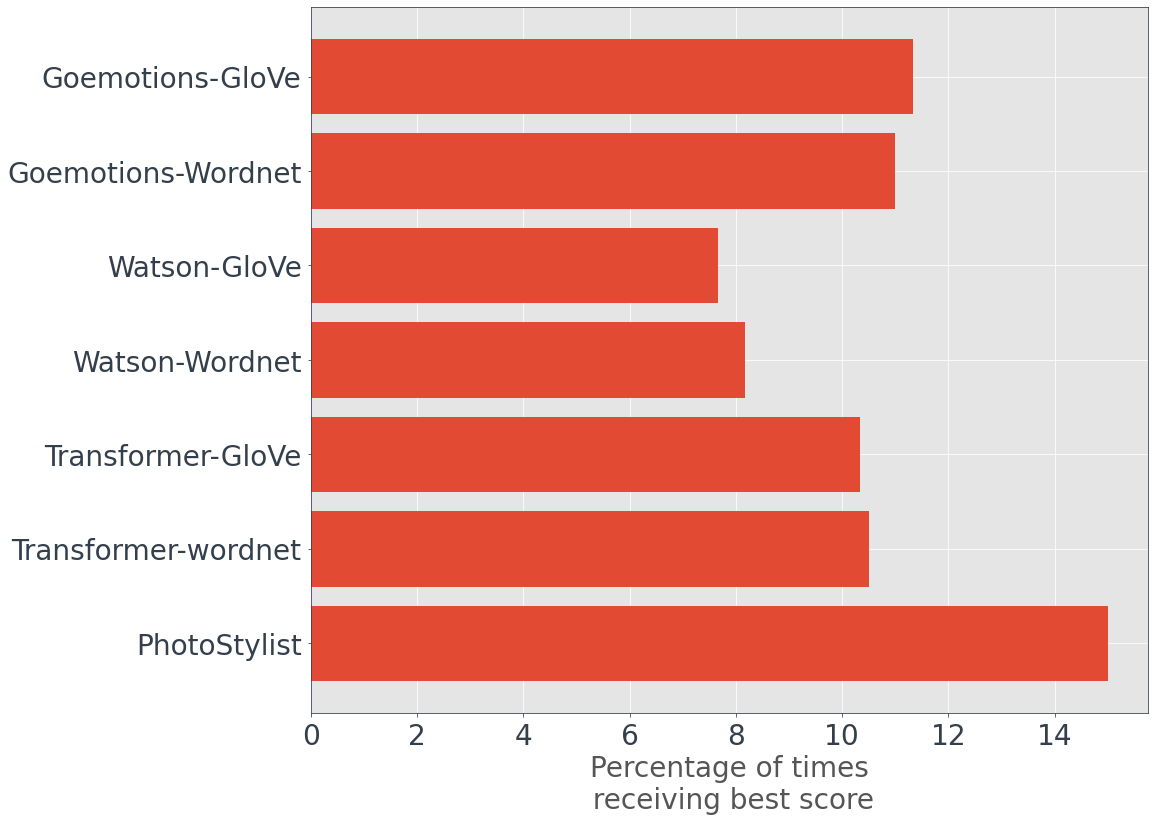

In [20]:
from collections import defaultdict 
def init_dict():
  return 0
best_count = defaultdict(init_dict)
model_list = ['textfaithpst', 'textfaithnvidiawordnet', 'textfaithnvidiaglove', 'textfaithwatsonwordnet', 'textfaithwatsonglove', 'textfaithgoemotionswordnet', 'textfaithgoemotionsglove']
if 'highest_score' not in newdatatextfaith:
  newdatatextfaith['highest_score'] = newdatatextfaith.max(axis=1)
for modelname in model_list:
  for index, row in newdatatextfaith.iterrows():
    if row[modelname] == row['highest_score']:
      best_count[modelname]+=1
  best_count[modelname] /= newdatatextfaith.shape[0]
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
renamepercent_dict = {}
for model in best_count.keys():
  if model == 'textfaithpst':
    renamepercent_dict['PhotoStylist'] = best_count[model] * 100
  elif model == 'textfaithnvidiaglove':
    renamepercent_dict['Transformer-GloVe'] = best_count[model] * 100
  elif model == 'textfaithnvidiawordnet':
    renamepercent_dict['Transformer-wordnet'] = best_count[model] * 100
  elif model == 'textfaithgoemotionsglove':
    renamepercent_dict['Goemotions-GloVe'] = best_count[model] * 100
  elif model == 'textfaithgoemotionswordnet':
    renamepercent_dict['Goemotions-Wordnet'] = best_count[model] * 100
  elif model == 'textfaithwatsonglove':
    renamepercent_dict['Watson-GloVe'] = best_count[model] * 100
  elif model == 'textfaithwatsonwordnet':
    renamepercent_dict['Watson-Wordnet'] = best_count[model] * 100
plt.style.use('seaborn-paper')
plt.style.use('ggplot')
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.figure(figsize=(15,13))
plt.barh(range(len(renamepercent_dict)), list(renamepercent_dict.values()), align='center')
plt.yticks(range(len(renamepercent_dict)), list(renamepercent_dict.keys()), fontsize=28)
plt.xticks(fontsize=28)
plt.xlabel('Percentage of times\n receiving best score', fontsize=28)
plt.show()



***Curtailed from paper***
# Here we pit our method against each algorithm separately and calculate the number of times our scheme receives a score greater than or equal to the score of the baseline.

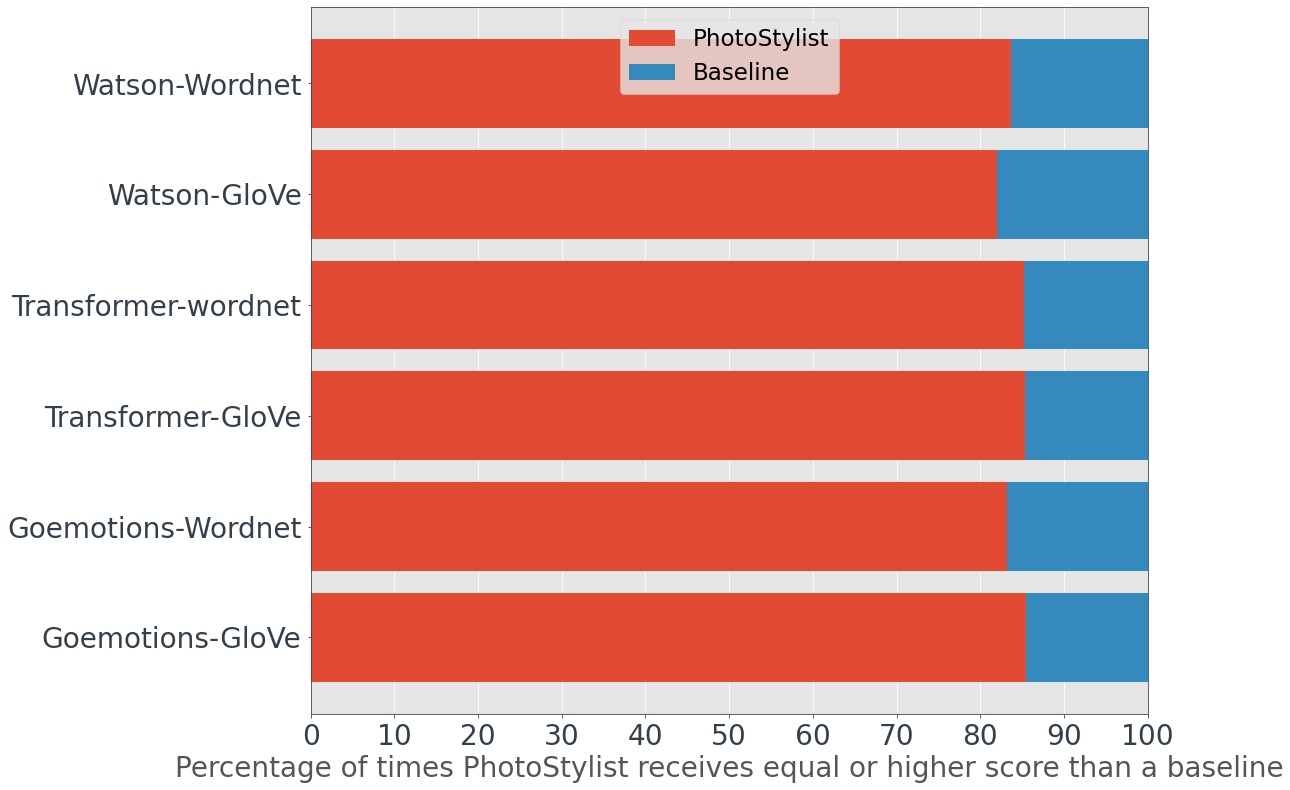

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 
import numpy as np
total = 0
def init():
  return 0
photostylistscore = defaultdict(init)
bothscore = defaultdict(init)
baselinescore = defaultdict(init)
model_list = ['textfaithnvidiawordnet', 'textfaithnvidiaglove', 'textfaithwatsonwordnet', 'textfaithwatsonglove', 'textfaithgoemotionswordnet', 'textfaithgoemotionsglove']
for index, row in newdatatextfaith.iterrows():
  total+=1
  for model in model_list:
    if row[model] < row['textfaithpst']:
      photostylistscore[model]+=1
    elif row[model] == row['textfaithpst']:
      bothscore[model]+=1
    else:
      baselinescore[model]+=1


for model in photostylistscore.keys():
  photostylistscore[model] /= total
  bothscore[model] /= total
  baselinescore[model] /= total

values1 = []
values2 = []
models = []
for model in sorted(photostylistscore.keys()):
  values2.append(photostylistscore[model] * 100)
  values1.append((1-photostylistscore[model]) * 100)
  if model == 'textfaithpst':
    models.append('PhotoStylist')
  elif model == 'textfaithnvidiaglove':
    models.append('Transformer-GloVe')
  elif model == 'textfaithnvidiawordnet':
    models.append('Transformer-wordnet')
  elif model == 'textfaithgoemotionsglove':
    models.append('Goemotions-GloVe')
  elif model == 'textfaithgoemotionswordnet':
    models.append('Goemotions-Wordnet')
  elif model == 'textfaithwatsonglove':
    models.append('Watson-GloVe')
  elif model == 'textfaithwatsonwordnet':
    models.append('Watson-Wordnet')
plt.style.use('seaborn-paper')
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.figure(figsize=(15,13))
p1 = plt.barh(np.arange(len(models)), list(values1), align='center')
p2 = plt.barh(np.arange(len(models)), list(values2), align='center', left=list(values1))
plt.yticks(np.arange(len(models)), list(models), fontsize=28)
plt.xticks(np.arange(0, 101, step=10),fontsize=28)
plt.xlabel('Percentage of times PhotoStylist receives equal or higher score than a baseline', fontsize=28)
plt.legend((p1[0], p2[0]), ('PhotoStylist', 'Baseline'), loc='upper center', prop={"size":23})
plt.xlim(0,100)
#plt.ylim(-0.7, 6.5)
plt.show()